# Lab: Introduction to Neural Networks in PyTorch

**Duration:** 3 Hours
**Topic:** Tensors, Linear Regression, and Non-Linear Neural Networks (MLPs)

## 1. Introduction
In this laboratory, you will explore PyTorch tensors, build a linear regression model, and finally construct a Multi-Layer Perceptron (MLP) to solve a non-linear classification problem.

**Learning Objectives:**
1. Manipulate PyTorch tensors.
2. Build custom `nn.Module` classes.
3. Understand why non-linearity (ReLU) is essential.

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

print(f'PyTorch version: {torch.__version__}')

PyTorch version: 2.3.1+cpu


## Part 1: Tensors (The Building Blocks)
Tensors are multi-dimensional arrays similar to NumPy arrays but can run on GPUs.

### Exercise 1: Creating Tensors
**Task:**
1. Create a random tensor with shape `(5, 3)` using `torch.rand`.
2. Create a tensor of all ones with shape `(2, 2)`.
3. Print their shapes and data types.

In [2]:
# Exercise 1
random_tensor = torch.rand((5, 3))
ones_tensor = torch.ones((2, 2))
print(random_tensor.shape, random_tensor.dtype)
print(ones_tensor.shape, ones_tensor.dtype)

torch.Size([5, 3]) torch.float32
torch.Size([2, 2]) torch.float32


### Exercise 2: Matrix Multiplication & Shapes
Matrix multiplication is strict about shapes. Inner dimensions must match: `(A, B) @ (B, C)` works.
**Task:** Fix the error in the code below using a transpose `.T` operation.

In [3]:
tensor_A = torch.tensor([[1, 2], [3, 4], [5, 6]]) # Shape (3, 2)
tensor_B = torch.tensor([[7, 10], [8, 11], [9, 12]]) # Shape (3, 2)

# TODO: Fix this line so it runs
result = tensor_A @ tensor_B.T
print(result)


tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


## Part 2: Linear Regression Data
We will create synthetic data for a linear regression problem: $y = weight * X + bias$.

1.  **Define Parameters:** Set `weight = 0.7` and `bias = 0.3`.
2.  **Generate Data:**
    * Create a tensor `X` with values from `0` to `1` with a step of `0.02`.
    * Create a tensor `y` using the linear regression formula: $y = \text{weight} \times X + \text{bias}$.
3.  **Split Data:**
    * Calculate the split index for an **80/20** split (80% training, 20% testing).
    * Create `X_train`, `y_train`, `X_test`, and `y_test` based on this split.
4.  **Verify:** Print the number of samples in the training and testing sets to confirm the split.

In [4]:
# Data for linear regression
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(1)
y = weight * X + bias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exercise 3: Visualization
**Task:** Run the helper function below to visualize the linear data.

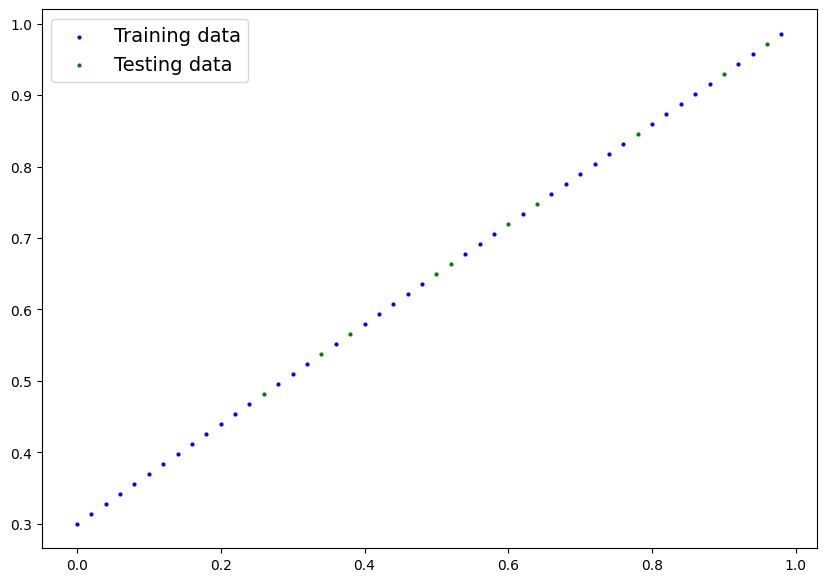

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, 
                     test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop={'size': 14})
    plt.show()

plot_predictions()

## Part 3: Building a Linear Model
**Exercise 4:** Define a subclass of `nn.Module` called `LinearRegressionModel`. Use `nn.Linear` in the constructor.

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x) -> torch.Tensor:
        return self.linear(x)

torch.manual_seed(42)
model_0 = LinearRegressionModel()

## Part 4: Training
**Exercise 5:** Setup Loss and Optimizer. Use `nn.L1Loss` (MAE) and `torch.optim.SGD`.

In [7]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

**Exercise 6:** Complete the training loop.

In [8]:
epochs = 100
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss.item()}')

Epoch: 0 | Loss: 0.5600506067276001
Epoch: 10 | Loss: 0.4383816719055176
Epoch: 20 | Loss: 0.3167126774787903
Epoch: 30 | Loss: 0.19504375755786896
Epoch: 40 | Loss: 0.07337480783462524
Epoch: 50 | Loss: 0.0360596664249897
Epoch: 60 | Loss: 0.029995162039995193
Epoch: 70 | Loss: 0.024409985169768333
Epoch: 80 | Loss: 0.018832748755812645
Epoch: 90 | Loss: 0.013247576542198658


**Exercise 7:** Prediction. Make predictions on `X_test` using `torch.inference_mode()`.

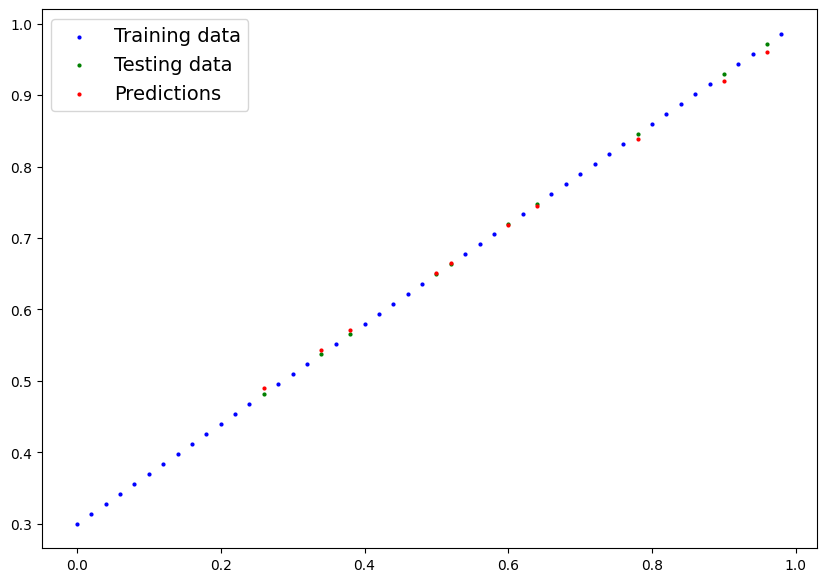

In [9]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

## Part 6: Non-Linear Data & Neural Networks (MLP)
Linear models cannot separate concentric circles. We need a neural network with **non-linear activation functions** (like ReLU) to bend the decision boundary.

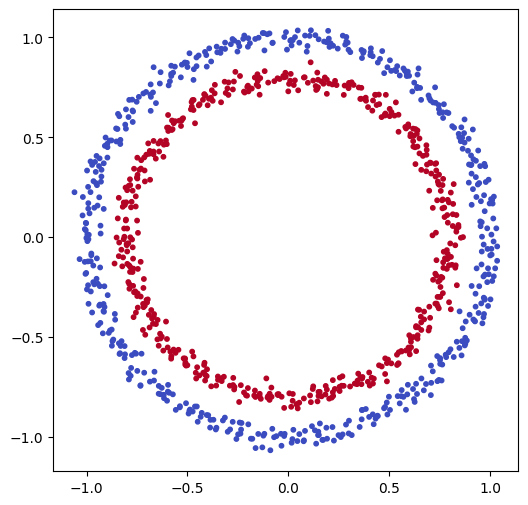

In [10]:
# Generate non-linear data
n_samples = 1000
X_circles, y_circles = make_circles(n_samples, noise=0.03, random_state=42)

# Convert to tensors
X_circles = torch.from_numpy(X_circles).float()
y_circles = torch.from_numpy(y_circles).float().unsqueeze(1)

# Split data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles.squeeze(), cmap='coolwarm', s=10)
plt.show()

### Exercise 8: Building a Non-Linear Model (MLP)
**Task:** Create a class `CircleModel` that subclasses `nn.Module`.
1. In `__init__`, define: 
   - `layer_1`: Linear (input 2 -> hidden 10)
   - `relu`: ReLU activation
   - `layer_2`: Linear (hidden 10 -> output 1)
2. In `forward`, connect them: `x -> layer_1 -> relu -> layer_2 -> output`

In [11]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.relu(x)
        return self.layer_2(x)

model_1 = CircleModel()
print(model_1)

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


### Exercise 9: Training the Classifier
**Task:** Train the model for 1000 epochs.
1. Loss Function: Use `nn.BCEWithLogitsLoss()` (Binary Cross Entropy for classification).
2. Optimizer: `SGD` with `lr=0.1`.
3. Loop: Forward pass -> Calculate Loss -> Zero Grad -> Backward -> Step.
*Hint: The model outputs 'logits'. To get accuracy, convert logits to labels.*

In [12]:
epochs = 1000
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)
for epoch in range(epochs):
    model_1.train()

    logits = model_1(X_train_c)
    loss = loss_fn(logits, y_train_c)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        model_1.eval()
        with torch.inference_mode():
            test_logits = model_1(X_test_c)
            preds = torch.round(torch.sigmoid(test_logits))
            acc = (preds == y_test_c).float().mean()
        print(f'Epoch: {epoch} | Loss: {loss.item():.5f} | Acc: {acc.item():.4f}')

Epoch: 0 | Loss: 0.70744 | Acc: 0.5000
Epoch: 100 | Loss: 0.69448 | Acc: 0.3850
Epoch: 200 | Loss: 0.69194 | Acc: 0.5100


Epoch: 300 | Loss: 0.68971 | Acc: 0.5300
Epoch: 400 | Loss: 0.68739 | Acc: 0.5400


Epoch: 500 | Loss: 0.68453 | Acc: 0.5550
Epoch: 600 | Loss: 0.68133 | Acc: 0.6400
Epoch: 700 | Loss: 0.67757 | Acc: 0.6750


Epoch: 800 | Loss: 0.67318 | Acc: 0.6550
Epoch: 900 | Loss: 0.66842 | Acc: 0.6650
